In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
import os
os.listdir()

['.ipynb_checkpoints',
 'gender_submission.csv',
 'test.csv',
 'train.csv',
 'Untitled.ipynb']

In [51]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
subFile = pd.read_csv('gender_submission.csv')

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
train.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [54]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
train.shape, train.size

((891, 12), 10692)

In [56]:
train.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [57]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [58]:
train.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [97]:
train.Age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [61]:
train.Embarked

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [62]:
train['Age']=train['Age'].replace(0, np.NaN)

In [63]:
train['Embarked']=train['Embarked'].replace(0, np.NaN)

In [64]:
train['Embarked'].dropna(inplace=True)

In [65]:
train['Age'].fillna(value=train['Age'].mean(), inplace=True)

In [66]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [67]:
train.Age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [68]:
pd.crosstab(train['Survived'], train['Age'])

Age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
Survived,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,2,7,1,3,0,...,2,0,2,3,1,2,1,2,1,0
1,1,1,2,2,1,5,3,5,7,4,...,2,2,0,0,0,0,0,0,0,1


In [69]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


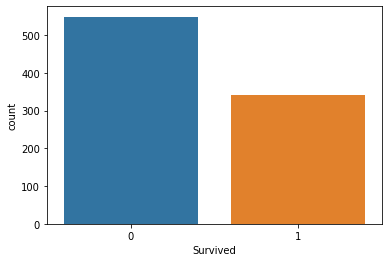

In [70]:
sns.countplot('Survived', data=train)

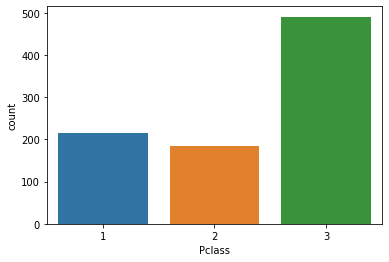

In [71]:
sns.countplot('Pclass', data=train)

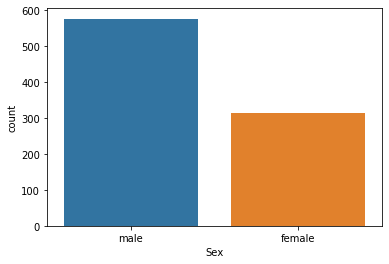

In [72]:
sns.countplot('Sex', data=train)

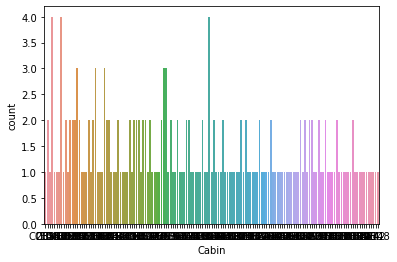

In [73]:
sns.countplot('Cabin', data=train)

In [74]:
pd.crosstab(train['Survived'], train['Cabin'])

Cabin,A10,A14,A16,A19,A20,A23,A24,A26,A31,A32,...,E8,F E69,F G63,F G73,F2,F33,F38,F4,G6,T
Survived,,,,,,,,,,,,,,,,,,,,,
0,1,1,0,1,0,0,1,0,0,1,...,0,0,1,2,1,0,1,0,2,1
1,0,0,1,0,1,1,0,1,1,0,...,2,1,0,0,2,3,0,2,2,0


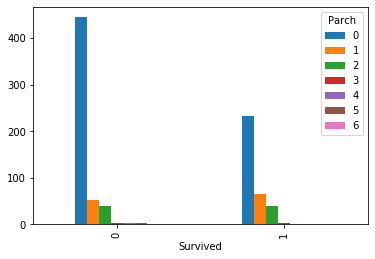

In [75]:
pd.crosstab(train['Survived'], train['Parch']).plot(kind='bar')

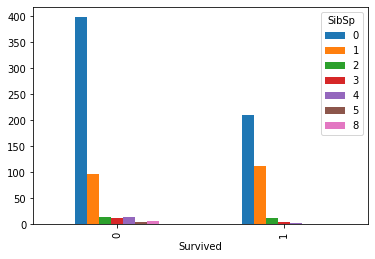

In [76]:
pd.crosstab(train['Survived'], train['SibSp']).plot(kind='bar')

In [77]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


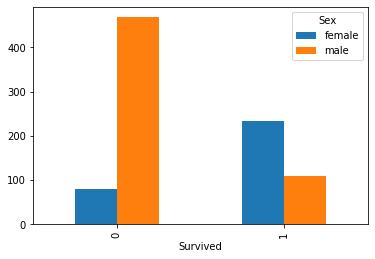

In [78]:
pd.crosstab(train['Survived'], train['Sex']).plot(kind='bar')

In [79]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
train['Sex'] = train['Sex'].map({'female' : 0, 'male' : 1})

In [81]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [82]:
train = pd.get_dummies(train, columns= ['Pclass', 'Embarked', 'Cabin', 'SibSp',
'Parch'], prefix_sep='_')
test = pd.get_dummies(test, columns= ['Pclass', 'Embarked', 'Cabin', 'SibSp',
'Parch'], prefix_sep='_')


In [83]:
train.head()

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,0,"Allen, Mr. William Henry",1,35.0,373450,8.0500,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [84]:
category=pd.cut(train.Age,bins= [0, 2,17,65,99], labels= ['Toddler/Baby', 'Child', 'Adult', 'Elderly'])
category=pd.cut(test.Age,bins= [0, 2,17,65,99], labels= ['Toddler/Baby', 'Child', 'Adult', 'Elderly'])

In [85]:
train.insert(5, 'Age_group', category)
test.insert(5, 'Age_group', category)

In [86]:
train.head(8)

,PassengerId,Survived,Name,Sex,Age,Age_group,Ticket,Fare,Pclass_1,Pclass_2,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0,"Braund, Mr. Owen Harris",1,22.000000,Adult,A/5 21171,7.2500,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,Adult,PC 17599,71.2833,1,0,...,0,0,0,1,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.000000,Adult,STON/O2. 3101282,7.9250,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,Adult,113803,53.1000,1,0,...,0,0,0,1,0,0,0,0,0,0
4,5,0,"Allen, Mr. William Henry",1,35.000000,Adult,373450,8.0500,0,0,...,0,0,0,1,0,0,0,0,0,0
5,6,0,"Moran, Mr. James",1,29.699118,Child,330877,8.4583,0,0,...,0,0,0,1,0,0,0,0,0,0
6,7,0,"McCarthy, Mr. Timothy J",1,54.000000,Adult,17463,51.8625,1,0,...,0,0,0,1,0,0,0,0,0,0
7,8,0,"Palsson, Master. Gosta Leonard",1,2.000000,Adult,349909,21.0750,0,0,...,0,0,0,0,1,0,0,0,0,0


In [87]:
Age_train=train['Age_group'].value_counts(normalize=True)
Age_train=test['Age_group'].value_counts(normalize=True)


In [88]:
train['Norm_age'] = train['Age_group'].map(Age_train)
test['Norm_age'] = test['Age_group'].map(Age_train)

In [89]:
train.head()

,PassengerId,Survived,Name,Sex,Age,Age_group,Ticket,Fare,Pclass_1,Pclass_2,...,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Norm_age
0,1,0,"Braund, Mr. Owen Harris",1,22.0,Adult,A/5 21171,7.2500,0,0,...,0,0,1,0,0,0,0,0,0,0.870482
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,Adult,PC 17599,71.2833,1,0,...,0,0,1,0,0,0,0,0,0,0.870482
2,3,1,"Heikkinen, Miss. Laina",0,26.0,Adult,STON/O2. 3101282,7.9250,0,0,...,0,0,1,0,0,0,0,0,0,0.870482
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,Adult,113803,53.1000,1,0,...,0,0,1,0,0,0,0,0,0,0.870482
4,5,0,"Allen, Mr. William Henry",1,35.0,Adult,373450,8.0500,0,0,...,0,0,1,0,0,0,0,0,0,0.870482


In [90]:
#drop useless features
train.drop(['Name','Ticket','Fare', 'Age_group'], axis=1, inplace=True)
test.drop(['Name','Ticket','Fare', 'Age_group'], axis=1, inplace=True)

In [91]:
train.head(10)

,PassengerId,Survived,Sex,Age,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,...,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Norm_age
0,1,0,1,22.000000,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0.870482
1,2,1,0,38.000000,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0.870482
2,3,1,0,26.000000,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0.870482
3,4,1,0,35.000000,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0.870482
4,5,0,1,35.000000,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0.870482
5,6,0,1,29.699118,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0.093373
6,7,0,1,54.000000,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0.870482
7,8,0,1,2.000000,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0.870482
8,9,1,0,27.000000,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0.870482
9,10,1,0,14.000000,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0.870482


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [93]:
# Define input and output columns
in_cols = train.columns[2:]
target_col = 'Survived'
in_cols

Index(['Sex', 'Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Cabin_A10', 'Cabin_A14',
       ...
       'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Norm_age'],
      dtype='object', length=170)

In [4]:
#data splitting
train_all = train.copy().dropna()
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30, random_state=42)
valid = train_all.loc[train_all.date > '2011-01-01']
print(train.shape, valid.shape)

NameError: name 'train' is not defined

In [ ]:
# Get our X and y training and validation sets ready
X_train, y_train = train[in_cols], train[target_col]
X_valid, y_valid = valid[in_cols], valid[target_col]

# Create and fit the model
model = RandomForestRegressor(n_estimators=10, max_depth=39)
model.fit(X_train, y_train)

# Make predictions
preds = model.predict(X_valid)

# Score
mean_squared_error(y_valid, preds)**0.5 # RMSE - should match Zindi score. Lower is better